### Midterm project - Kaggle exercise project

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Goals

* Get familar with Kaggle competition since our final project may be a real Kaggle competition.
* Practice on large data set
* Data quality checking, missing data imputation
* Feature selection. What's your rationals to choose those features.
* Create at least 5 new features and explain your reason for every new features.
* Use feature importance to help you choose 10 features
* Choose 3 ML algorithms we covered in the class to build your prediction models
* For each model you build, you will need to evaluate and show your effort to improve it.
* Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments.
* Your score is based on completeness on every step.
* Submit in HTML and ipynb format on canvas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house_train_data = pd.read_csv('train.csv')

In [3]:
house_test_data = pd.read_csv('test.csv')

## Data Exploration: quality checking

In [4]:
house_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
len(house_train_data)

1460

In [6]:
house_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
house_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
len(house_test_data)

1459

* MSSubClass : identifies the type of dwelling involved in the sale , categorical data
* MSZoning : Identifies the general zoning classification of the sale, catgegorical data
* LotFrontage : Linear feet of street connected to property, continous data
* LotArea : Lot size in square feet, continous data
* Street : Type of road access to property, catgegorical data
* Alley : Type of alley access to property, categorical data, NA = 'No alley access'
* LotShape : General shape of property, categorical data
* LandContour : Flatness of the property, categorical data
* Utilities : Type of utilities available categorical
* LotConfig : Lot configuration, categorical
* LandSlope : Slope of property, catgegorical
* Neighborhood : Physical locations within Ames city limits, categorical
* Condition1: Proximity to various conditions, categorical
* Condition2: Proximity to various conditions (if more than one is present), categorical
* BldgType: Type of dwelling, categorical
* HouseStyle: Style of dwelling, categorical
* OverallQual: Rates the overall material and finish of the house, ordinal
* OverallCond: Rates the overall condition of the house, ordinal
* YearBuilt: Original construction date, continous
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* RoofStyle: Type of roof, categorical
* RoofMatl: Roof material, categorical
* Exterior1st: Exterior covering on house, categorical
* Exterior2nd: Exterior covering on house (if more than one material), categorical
* MasVnrType: Masonry veneer type, categorical
* MasVnrArea: Masonry veneer area in square feet, continous
* ExterQual: Evaluates the quality of the material on the exterior, ordinal
* ExterCond: Evaluates the present condition of the material on the exterior, ordinal
* Foundation: Type of foundation, categorical, ordinal , slab and concrete better
* BsmtQual: Evaluates the height of the basement, ordinal
* BsmtCond: Evaluates the general condition of the basement, ordinal
* BsmtExposure: Refers to walkout or garden level walls, ordinal
* BsmtFinType1: Rating of basement finished area, ordinal
* BsmtFinSF1: Type 1 finished square feet, continous data and will not be used
* BsmtFinType2: Rating of basement finished area (if multiple types), categorical, will not be used
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating, categorical
* HeatingQC: Heating quality and condition, ordinal
* CentralAir: Central air conditioning, Y and N
* Electrical: Electrical system, categorical , do not use
* KitchenQual: Kitchen quality, ordinal
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms), continous
* Functional: Home functionality (Assume typical unless deductions are warranted), ordinal, may be used
* Fireplaces: Number of fireplaces, continous
* FireplaceQu: Fireplace quality, continous
* GarageType: Garage location, continous
* GarageYrBlt: Year garage was built, continous
* GarageFinish: Interior finish of the garage, categorical/ ordinal
* GarageCars: Size of garage in car capacity, continous
* GarageArea: Size of garage in square feet, continous
* GarageQual: Garage quality, ordinal NA = No Garage
* GarageCond: Garage condition, ordinal
* PavedDrive: Paved driveway, categorical
* WoodDeckSF: Wood deck area in square feet, continous
* OpenPorchSF: Open porch area in square feet, continous
* EnclosedPorch: Enclosed porch area in square feet, continous
* 3SsnPorch: Three season porch area in square feet, continous
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet, continous
* PoolQC: Pool quality, ordinal
* Fence: Fence quality, ordinal
* MiscFeature: Miscellaneous feature not covered in other categories, NA = None , categorical data
* MiscVal: Value of miscellaneous feature, continous
* MoSold: Month Sold (MM), categorical
* YrSold: Year Sold (YYYY), continous
* SaleType: Type of sale, categorical
* SaleCondition: Condition of sale, categorical

## Missing data imputation

In [9]:
house_train_data.isnull().values.any()

True

In [10]:
house_train_data.columns[house_train_data.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
len(house_train_data[house_train_data.LotFrontage.isnull()])

259

In [12]:
len(house_train_data[house_train_data.LotFrontage.isnull()])/len(house_train_data)

0.1773972602739726

* In the LotFrontage column, we will be using the mean to represent nan values

In [13]:
house_train_data.LotFrontage.fillna(house_train_data.LotFrontage.median(), inplace=True)

In [14]:
house_train_data.LotFrontage.isnull().values.any()

False

In [15]:
house_train_data.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [16]:
len(house_train_data[house_train_data.Alley.isnull()])/len(house_train_data)

0.9376712328767123

* SInce most of the data in Alley is null, we will discard this column

In [17]:
del house_train_data['Alley']

In [18]:
house_train_data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [19]:
len(house_train_data[house_train_data.MasVnrType.isnull()])/len(house_train_data)

0.005479452054794521

* we will use mode to replace nan with the mode of the column

In [20]:
house_train_data['MasVnrType'].fillna(house_train_data['MasVnrType'].mode()[0], inplace = True)

In [21]:
house_train_data.MasVnrType.isnull().values.any()

False

In [22]:
len(house_train_data[house_train_data.MasVnrArea.isnull()])/len(house_train_data)

0.005479452054794521

In [23]:
house_train_data.MasVnrArea.fillna(house_train_data.MasVnrArea.median(), inplace=True)

In [24]:
house_train_data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [25]:
base_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [26]:
len(house_train_data[house_train_data.BsmtQual.isnull()])/len(house_train_data)

0.025342465753424658

In [27]:
for col in base_cols:
    house_train_data[col].fillna('No Basement', inplace=True)

In [28]:
house_train_data.BsmtQual.isnull().values.any()

False

In [29]:
len(house_train_data[house_train_data.FireplaceQu.isnull()])/len(house_train_data)

0.4726027397260274

* Since half of the data in FireplaceQu is null, we will discard this column

In [30]:
del house_train_data['FireplaceQu']

In [31]:
len(house_train_data[house_train_data.Electrical.isnull()])/len(house_train_data)

0.0006849315068493151

In [32]:
house_train_data['Electrical'].fillna(house_train_data['Electrical'].mode()[0], inplace=True)

In [33]:
garage_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']

In [34]:
len(house_train_data[house_train_data.GarageFinish.isnull()])/len(house_train_data)

0.05547945205479452

In [35]:
for col in garage_cols:
    house_train_data[col].fillna('No Garage', inplace=True)

In [36]:
house_train_data.GarageYrBlt.fillna(house_train_data.GarageYrBlt.median(), inplace=True)

In [37]:
len(house_train_data[house_train_data.PoolQC.isnull()])/len(house_train_data)

0.9952054794520548

Since most of the data in PoolQc is null, we will discard this column

In [38]:
del house_train_data['PoolQC']

In [39]:
len(house_train_data[house_train_data.Fence.isnull()])/len(house_train_data)

0.8075342465753425

Since most of the data in Fence is null, we will discard this column

In [40]:
del house_train_data['Fence']

In [41]:
len(house_train_data[house_train_data.MiscFeature.isnull()])/len(house_train_data)

0.963013698630137

Since most of the data in MiscFeature is null, we will discard this column

In [42]:
del house_train_data['MiscFeature']

In [43]:
house_train_data.isnull().values.any()

False

Columns deleted thus far are Fence, MiscFeature, PoolQC, And FireplaceQu and Alley

In [44]:
# we will delete these columns from test data

del house_test_data['Alley']
del house_test_data['FireplaceQu']
del house_test_data['PoolQC']
del house_test_data['Fence']
del house_test_data['MiscFeature']

In [45]:
house_test_data.columns[house_test_data.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [46]:
columns_test_check = house_test_data.columns[house_test_data.isnull().any()].tolist()

In [47]:
for col in columns_test_check:
    print(col, len(house_test_data[house_test_data[col].isnull()])/len(house_test_data) )

MSZoning 0.0027416038382453737
LotFrontage 0.15558601782042494
Utilities 0.0013708019191226869
Exterior1st 0.0006854009595613434
Exterior2nd 0.0006854009595613434
MasVnrType 0.010966415352981495
MasVnrArea 0.01028101439342015
BsmtQual 0.03015764222069911
BsmtCond 0.030843043180260453
BsmtExposure 0.03015764222069911
BsmtFinType1 0.02878684030157642
BsmtFinSF1 0.0006854009595613434
BsmtFinType2 0.02878684030157642
BsmtFinSF2 0.0006854009595613434
BsmtUnfSF 0.0006854009595613434
TotalBsmtSF 0.0006854009595613434
BsmtFullBath 0.0013708019191226869
BsmtHalfBath 0.0013708019191226869
KitchenQual 0.0006854009595613434
Functional 0.0013708019191226869
GarageType 0.0520904729266621
GarageYrBlt 0.053461274845784786
GarageFinish 0.053461274845784786
GarageCars 0.0006854009595613434
GarageArea 0.0006854009595613434
GarageQual 0.053461274845784786
GarageCond 0.053461274845784786
SaleType 0.0006854009595613434


we could use all columns but we need to make sure we delete columns which were removed in train data

In [48]:
mode_cols_test = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinSF1', 'BsmtFinSF2',
                  'BsmtUnfSF','TotalBsmtSF','KitchenQual','Functional', 'SaleType']
mean_cols_test = ['LotFrontage', 'MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars',
                  'GarageArea',]
no_base_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [49]:
garage_cols = ['GarageType','GarageFinish', 'GarageQual','GarageCond']

In [50]:
for col in mode_cols_test:
    house_test_data[col].fillna(house_test_data[col].mode()[0], inplace=True)

In [51]:
for col in mean_cols_test:
    house_test_data[col].fillna(house_test_data[col].median(), inplace=True)

In [52]:
for col in no_base_cols:
    house_test_data[col].fillna('No Basement', inplace=True)

In [53]:
for col in garage_cols:
    house_test_data[col].fillna('No Garage', inplace=True)

In [54]:
house_test_data.isnull().values.any()

False

* All missing and null values are taken care of in both the test and training data.

## Feature selection

* what 5 features we can produce from the existing features.
* will use the following features to predict house price based on prior knowledge
* usually house price is dictated by the type of house, roof quality, exterior material, and lot area.


* MSSubClass, LotArea, Street, LandContour, Utilities, Neighborhood, BldgType, OverallQual, YearRemodAdd,
* RoofMatl, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, TotalBsmtSF, HeatingQC, CentralAir, 
* KitchenQual, TotRmsAbvGrd, GarageArea, GarageQual

* the features above will be analyzed to and possibly used as features to predict sale price.


In [55]:
house_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [56]:
house_train_data.var()

Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      4.852186e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.266383e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      5.758570e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

In [57]:
columns_del_var = ['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','KitchenAbvGr', 'Fireplaces']
for col in columns_del_var:
    del house_test_data[col]
    del house_train_data[col]

In [58]:
house_test_data.var()

Id               1.775117e+05
MSSubClass       1.827296e+03
LotFrontage      4.230924e+02
LotArea          2.455715e+07
OverallQual      2.064428e+00
OverallCond      1.240416e+00
YearBuilt        9.235564e+02
YearRemodAdd     4.464966e+02
MasVnrArea       3.132963e+04
BsmtFinSF1       2.072590e+05
BsmtFinSF2       3.122242e+04
BsmtUnfSF        1.912762e+05
TotalBsmtSF      1.967747e+05
1stFlrSF         1.585360e+05
2ndFlrSF         1.769130e+05
LowQualFinSF     1.939808e+03
GrLivArea        2.357744e+05
BedroomAbvGr     6.885487e-01
TotRmsAbvGrd     2.276763e+00
GarageYrBlt      6.613158e+02
GarageCars       6.017153e-01
GarageArea       4.707782e+04
WoodDeckSF       1.631875e+04
OpenPorchSF      4.744918e+03
EnclosedPorch    4.519572e+03
3SsnPorch        4.083569e+02
ScreenPorch      3.204665e+03
PoolArea         9.297405e+02
MiscVal          3.979174e+05
MoSold           7.411635e+00
YrSold           1.694527e+00
dtype: float64

In [59]:
#del house_test_data['Id']
del house_train_data['Id']

## New features

In [60]:
house_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [61]:

#house_train_data.select_dtypes('float').columns

int_columns_train = house_train_data.select_dtypes(exclude='object').columns[:-1]
int_columns_test = house_test_data.select_dtypes(exclude='object').columns[1:]

In [62]:
int_columns_train

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [63]:
int_columns_test

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

#### The standardization will be conducted before processing the data to check any highly correlated features and variances. 


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in int_columns_train:
    temp_col = scaler.fit_transform(house_train_data[col].to_numpy().reshape(-1,1))
    house_train_data.drop(house_train_data[[col]],axis = 1 , inplace= True)
    house_train_data[col] = temp_col

In [65]:
for col in int_columns_test:
    temp_col = scaler.fit_transform(house_test_data[col].to_numpy().reshape(-1,1))
    house_test_data.drop(house_test_data[[col]],axis = 1 , inplace= True)
    house_test_data[col] = temp_col

In [66]:
house_train_data.corrwith(house_train_data.SalePrice)

SalePrice        1.000000
MSSubClass      -0.084284
LotFrontage      0.334771
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BedroomAbvGr     0.168213
TotRmsAbvGrd     0.533723
GarageYrBlt      0.466754
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
dtype: float64

In [67]:
house_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   Street         1459 non-null   object 
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   Utilities      1459 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   Condition1     1459 non-null   object 
 10  Condition2     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  RoofStyle      1459 non-null   object 
 14  RoofMatl       1459 non-null   object 
 15  Exterior1st    1459 non-null   object 
 16  Exterior2nd    1459 non-null   object 
 17  MasVnrType     1459 non-null   object 
 18  ExterQua

In [68]:
house_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   Street         1460 non-null   object 
 2   LotShape       1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  RoofStyle      1460 non-null   object 
 13  RoofMatl       1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  ExterQual      1460 non-null   object 
 18  ExterCon

In [69]:
# check the highest correlated pairs
df=house_train_data.drop('SalePrice', 1).copy()
tempdf = df.corr().abs()

s = tempdf.unstack()
so = s.sort_values(ascending=False)
so[28:71]

MiscVal       MiscVal         1.000000
MSSubClass    MSSubClass      1.000000
GarageArea    GarageCars      0.882475
GarageCars    GarageArea      0.882475
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
YearBuilt     GarageYrBlt     0.777182
GarageYrBlt   YearBuilt       0.777182
GrLivArea     2ndFlrSF        0.687501
2ndFlrSF      GrLivArea       0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BedroomAbvGr  TotRmsAbvGrd    0.676620
YearRemodAdd  GarageYrBlt     0.616444
GarageYrBlt   YearRemodAdd    0.616444
TotRmsAbvGrd  2ndFlrSF        0.616423
2ndFlrSF      TotRmsAbvGrd    0.616423
OverallQual   GarageCars      0.600671
GarageCars    OverallQual     0.600671
OverallQual   GrLivArea       0.593007
GrLivArea     OverallQual     0.593007
YearRemodAdd  YearBuilt       0.592855
YearBuilt     YearRemodAdd    0.592855
OverallQual   YearBuilt       0.572323
YearBuilt     OverallQual

In [70]:
# GrLivArea     TotRmsAbvGrd
# TotalBsmtSF   1stFlrSF
# YearBuilt     GarageYrBlt
# OverallQual   GarageArea
# BedroomAbvGr  2ndFlrSF

In [71]:
Columns_delete = ['GrLivArea','TotRmsAbvGrd','TotalBsmtSF','1stFlrSF','YearBuilt', 'GarageYrBlt','OverallQual',
                 'GarageArea','BedroomAbvGr','2ndFlrSF']

In [72]:
house_train_data['TotGrRmsArea'] = house_train_data['GrLivArea'] + house_train_data['TotRmsAbvGrd']
house_train_data['TotBsmt1stSF'] = house_train_data['TotalBsmtSF'] + house_train_data['1stFlrSF']
house_train_data['YrBuiltGarage'] = house_train_data['YearBuilt'] + house_train_data['GarageYrBlt']
house_train_data['Garage_Overall'] = house_train_data['OverallQual'] + house_train_data['GarageArea']
house_train_data['BedAbvGr'] = house_train_data['BedroomAbvGr'] + house_train_data['2ndFlrSF']

In [73]:
house_test_data['TotGrRmsArea'] = house_test_data['GrLivArea'] + house_test_data['TotRmsAbvGrd']
house_test_data['TotBsmt1stSF'] = house_test_data['TotalBsmtSF'] + house_test_data['1stFlrSF']
house_test_data['YrBuiltGarage'] = house_test_data['YearBuilt'] + house_test_data['GarageYrBlt']
house_test_data['Garage_Overall'] = house_test_data['OverallQual'] + house_test_data['GarageArea']
house_test_data['BedAbvGr'] = house_test_data['BedroomAbvGr'] + house_test_data['2ndFlrSF']

In [74]:
temp_train_df = house_train_data.drop(Columns_delete, axis = 1).copy()

In [75]:
temp_train_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'TotGrRmsArea', 'TotBsmt1stSF', 'YrBuiltGarage', 'Garage_Overall',
       'BedAbvGr'],
      dtype='ob

In [76]:
temp_test_df = house_test_data.drop(Columns_delete, axis = 1).copy()

In [77]:
temp_test_df.columns

Index(['Id', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'TotGrRmsArea', 'TotBsmt1stSF',
       'YrBuiltGarage', 'Garage_Overall', 'BedAbvGr'],
      dtype='object')

In [78]:
temp_train_df_dummies = pd.get_dummies(temp_train_df)

## Feature importance

In [79]:
from sklearn.ensemble import RandomForestRegressor
df=temp_train_df_dummies.drop(['SalePrice'], axis=1).copy()
df


,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,-0.517200,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,0.460320,-0.091886,2.179628,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,-0.120242,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,-0.084636,0.073480,-0.517200,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.120242,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.447940,-0.096897,-0.517200,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.120242,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.641972,0.375148,-0.517200,0.733308,1.366489,0.463568,-0.288653,-0.174865,-0.120242,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.357114,-0.260560,-0.517200,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1456,-0.872563,0.687385,0.266407,0.381743,0.151865,0.087911,0.759659,0.722112,0.049262,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1457,0.309859,-0.175462,-0.147810,3.078570,1.024029,-0.570750,-0.369871,-0.288653,0.701265,-0.120242,...,0,0,0,1,0,0,0,0,1,0
1458,-0.872563,-0.084636,-0.080160,0.381743,0.539493,-0.570750,-0.865548,6.092188,-1.284176,-0.120242,...,0,0,0,1,0,0,0,0,1,0


In [80]:
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df,temp_train_df_dummies.SalePrice)

RandomForestRegressor(max_depth=10, random_state=1)

In [81]:
dict(reversed(sorted(zip(model.feature_importances_, df.columns.values))))

{0.6763345382064203: 'Garage_Overall',
 0.06524262403725163: 'TotGrRmsArea',
 0.043895558684099695: 'TotBsmt1stSF',
 0.036665430907720925: 'BedAbvGr',
 0.025430504496509604: 'BsmtFinSF1',
 0.014097068018004809: 'LotArea',
 0.008957410359975508: 'BsmtQual_Ex',
 0.006850122434882002: 'GarageType_Detchd',
 0.006754776904153373: 'YearRemodAdd',
 0.006638039370863217: 'YrBuiltGarage',
 0.006447574440270935: 'OpenPorchSF',
 0.006019183709037385: 'BsmtUnfSF',
 0.005724750143748983: 'WoodDeckSF',
 0.005683024032775237: 'MasVnrArea',
 0.005215149592578093: 'LotFrontage',
 0.0046826450981291255: 'MoSold',
 0.004460052539605287: 'OverallCond',
 0.003511705600619221: 'KitchenQual_Ex',
 0.0024843675768811985: 'Neighborhood_Crawfor',
 0.0022953373902536442: 'KitchenQual_TA',
 0.002072215735602459: 'MSZoning_RL',
 0.002055642994920967: 'MSSubClass',
 0.002000481469811394: 'ScreenPorch',
 0.0017704189885510671: 'ExterQual_TA',
 0.0016854880534486756: 'YrSold',
 0.001467300542900654: 'BsmtQual_TA',
 0.

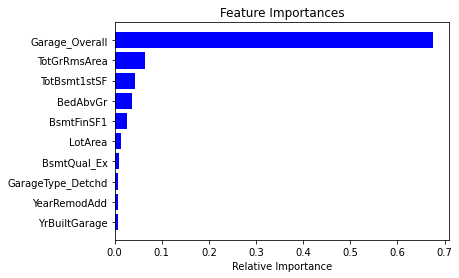

In [82]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* As we can see from the data we will be using the 10 features mentioned above.

In [83]:
top_10_model_df = df[['Garage_Overall','TotGrRmsArea','TotBsmt1stSF','BedAbvGr','BsmtFinSF1',
                      'LotArea','BsmtQual_Ex','GarageType_Detchd','YrBuiltGarage','OpenPorchSF']]
top_10_model_df.head()

,Garage_Overall,TotGrRmsArea,TotBsmt1stSF,BedAbvGr,BsmtFinSF1,LotArea,BsmtQual_Ex,GarageType_Detchd,YrBuiltGarage,OpenPorchSF
0,1.002480,1.282543,-1.252736,1.325631,0.575425,-0.207142,0,0,2.068592,0.216503
1,-0.132567,-0.801195,0.723605,-0.631384,1.171992,-0.091886,0,0,0.048807,-0.704483
2,1.283205,0.196329,-0.941195,1.353130,0.092907,0.073480,0,0,1.918978,-0.070361
3,1.442283,0.680422,-1.209058,1.101055,-0.499274,-0.096897,0,1,-1.054464,-0.176048
4,3.073279,2.826982,0.154068,3.007900,0.463568,0.375148,0,0,1.844171,0.563760


## Splitting the training data to evaluate the models that will be used

In [84]:
X = top_10_model_df.values
y = temp_train_df_dummies['SalePrice'].values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model 1: Multiple Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = regressor.predict(X_test)

In [131]:
MLR_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
MLR_df.head()

,Actual,Predicted
0,200624,275842.458899
1,133000,129391.698717
2,110000,106387.035692
3,192000,217155.856338
4,88000,107884.684646


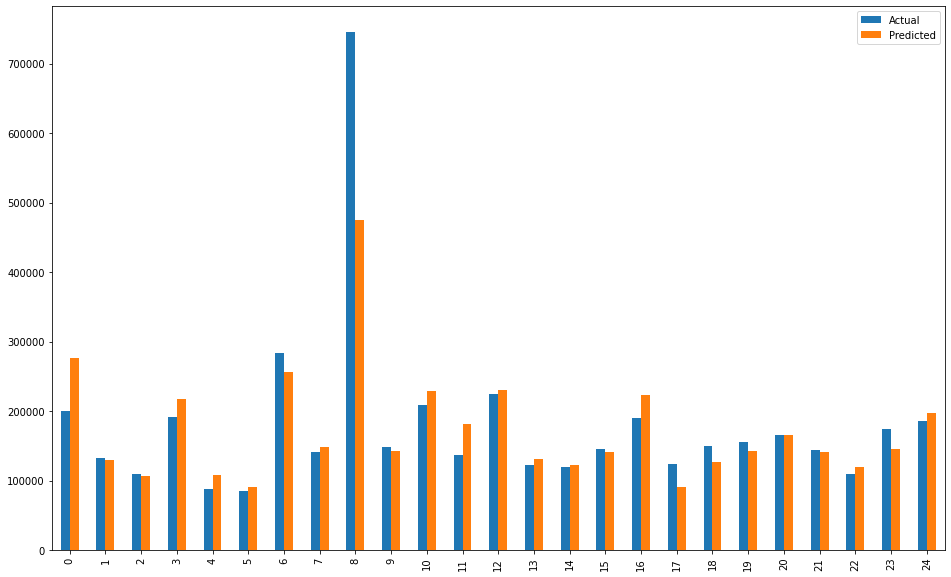

In [132]:
MLR_df_25 = MLR_df.head(25)
MLR_df_25.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluation

In [89]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 25416.954362579763
Mean Squared Error: 2574121966.0573254
Root Mean Squared Error: 50735.80556231787
R-squared Error: 0.6272548666022544


In [90]:
house_train_data['SalePrice'].mean()

180921.19589041095

* The value of root mean squared error is 50735.8, which is almost as thrice as greater than 10% of the mean value which is 180921.2
* This means that our algorithm was not very accurate.
* Also, the model explains 62.3% of the variation in the response variable around its mean. So, there is a place for improvement

In [91]:
house_train_data['SalePrice'].mean()* 0.1

18092.119589041096

### Attempts to improve the Multiple Linear Regression Model

#### Changing the features

In [92]:
df_new=df.copy()

In [93]:
df_new['Bedroom_TotRms'] = 0.1*house_train_data['BedroomAbvGr'] + 0.9*house_train_data['TotRmsAbvGrd']
df_new['Garage_Cars'] = 0.5*house_train_data['GarageArea'] + 0.5*house_train_data['GarageCars']
df_new['1st_Bsmt_SF'] = 0.1*house_train_data['1stFlrSF'] + 0.9*house_train_data['TotalBsmtSF']
df_new['Year_Mod'] = 0.4*house_train_data['YearRemodAdd'] + 0.6*house_train_data['YearBuilt']
df_new['BsmtSF'] = 0.5*house_train_data['BsmtFinSF1'] + 0.5*house_train_data['BsmtUnfSF']

df_new['OverallQual']=house_train_data['OverallQual']
df_new['GrLivArea']=house_train_data['GrLivArea']

In [94]:
#we will use 5 created features and 5 modified features
new_10_train=df_new[['Bedroom_TotRms','Garage_Cars','1st_Bsmt_SF','Year_Mod','BsmtSF',
                 'OverallQual','GrLivArea','BedAbvGr','LotArea','ExterQual_TA']]

In [95]:
new_10_train.head()

,Bedroom_TotRms,Garage_Cars,1st_Bsmt_SF,Year_Mod,BsmtSF,OverallQual,GrLivArea,BedAbvGr,LotArea,ExterQual_TA
0,0.837367,0.331362,-0.492716,0.982064,-0.184583,0.651479,0.370333,1.325631,-0.207142,0
1,-0.270437,0.125497,0.445532,-0.077791,0.265382,-0.071836,-0.482512,-0.631384,-0.091886,1
2,-0.270437,0.471725,-0.344814,0.922937,-0.104368,0.651479,0.515013,1.353130,0.073480,0
3,0.283465,1.220556,-0.670765,-1.406298,-0.280472,0.651479,0.383659,1.101055,-0.096897,1
4,1.513893,1.674396,0.175151,0.864302,0.144352,1.374795,1.299326,3.007900,0.375148,0


In [96]:
X_new = new_10_train.values

In [97]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [98]:
regressor.fit(X_train_new, y_train_new)

LinearRegression()

In [99]:
y_pred_new = regressor.predict(X_test_new)

In [133]:
MLR_df_2 = pd.DataFrame({'Actual': y_test_new, 'Predicted': y_pred_new})
MLR_df_2.head()

,Actual,Predicted
0,200624,287679.159069
1,133000,141572.164118
2,110000,105867.046325
3,192000,218134.898123
4,88000,111129.023392


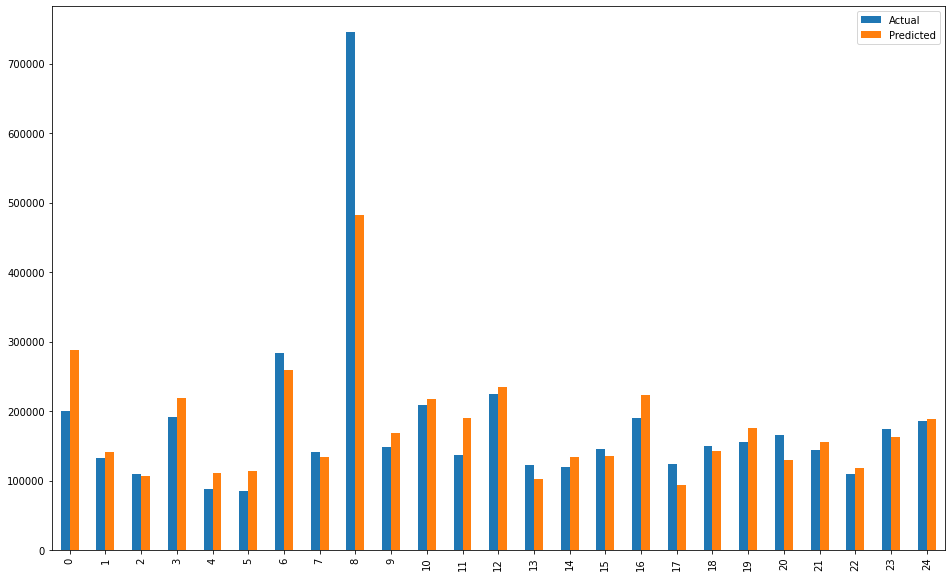

In [134]:
MLR_df_2_25 = MLR_df_2.head(25)
MLR_df_2_25.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluating the model after changing the features

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, y_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_new)))
print('R-squared Error:', metrics.r2_score(y_test_new, y_pred_new))

Mean Absolute Error: 25774.990882733797
Mean Squared Error: 2384793355.39353
Root Mean Squared Error: 48834.34606292512
R-squared Error: 0.6546705520936367


R-squared Error is a bit higher now, which means that model was improved

# Model 2: KNN for Regression

#### Preprocessing – Scaling the features

In [102]:
from sklearn import neighbors
knn_3=neighbors.KNeighborsRegressor(n_neighbors =3)
knn_3.fit(X_train_new, y_train_new)  #fit the model
predict = knn_3.predict(X_test_new)

In [135]:
knn_df = pd.DataFrame({'Actual': y_test_new, 'Predicted': predict})
knn_df.head()

,Actual,Predicted
0,200624,197000.000000
1,133000,129600.000000
2,110000,98166.666667
3,192000,210933.333333
4,88000,114833.333333


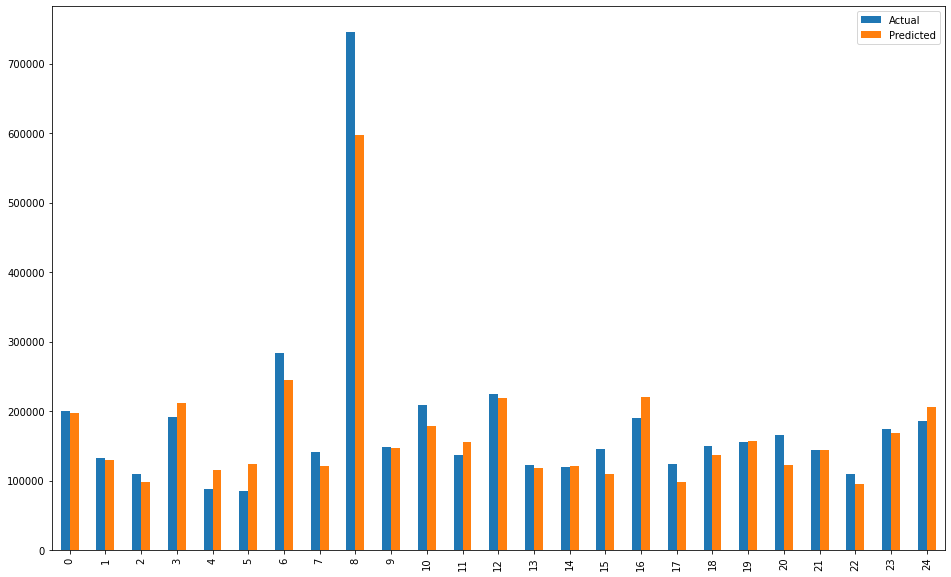

In [136]:
knn_df_25 = knn_df.head(25)
knn_df_25.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluation

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, predict)))
print('R-squared Error:', metrics.r2_score(y_test_new, predict))

Mean Absolute Error: 21372.83675799087
Mean Squared Error: 1157516111.7636986
Root Mean Squared Error: 34022.28845571236
R-squared Error: 0.8323861482949674


### Attempts to improve the KNN Model

#### Changing the n_neighbors to 2

In [105]:
#  create a classifier using k-Nearest Neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_new,  y_train_new)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_new, y_train_new)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_new, y_test_new) 

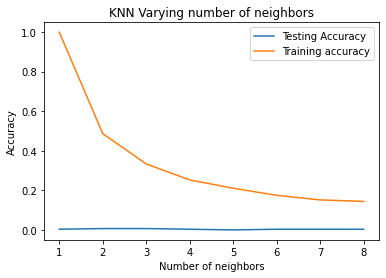

In [106]:
#Generate plot
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [108]:
from sklearn import neighbors
knn_2=neighbors.KNeighborsRegressor(n_neighbors =2)
knn_2.fit(X_train_new,  y_train_new)  #fit the model
predict_2 = knn_2.predict(X_test_new)

In [137]:
knn_2_df = pd.DataFrame({'Actual': y_test_new, 'Predicted': predict_2})
knn_2_df.head()

,Actual,Predicted
0,200624,205500.0
1,133000,121900.0
2,110000,94750.0
3,192000,215500.0
4,88000,116250.0


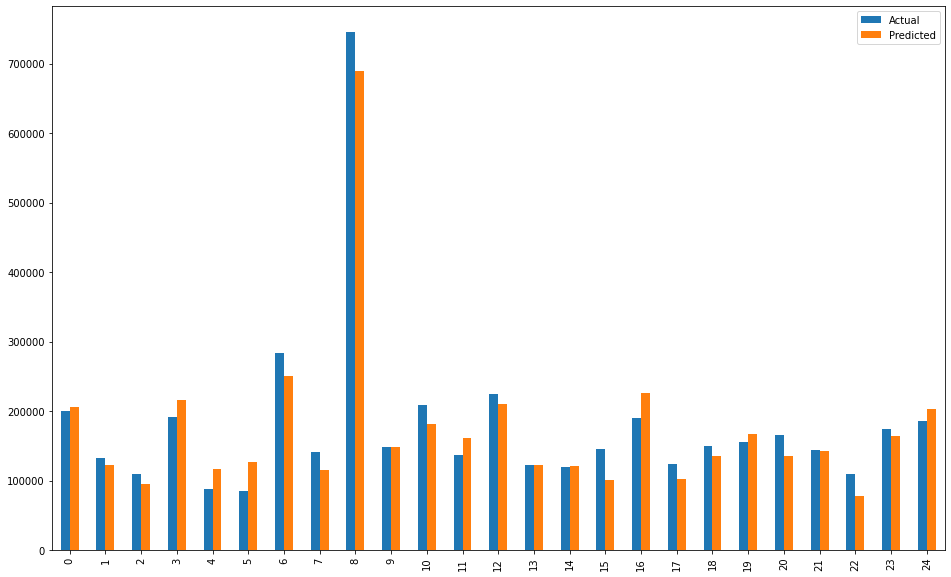

In [138]:
knn_df_2_25 = knn_2_df.head(25)
knn_df_2_25.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [109]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, predict_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, predict_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, predict_2)))
print('R-squared Error:', metrics.r2_score(y_test_new, predict_2))

Mean Absolute Error: 22101.587328767124
Mean Squared Error: 955644888.3107877
Root Mean Squared Error: 30913.506567692828
R-squared Error: 0.8616180639179762


R-squared Error is a bit higher now, which means that model was improved

# Model 3: Decision Tree for Regression

In [110]:
# X_test_new
# X_train_new
# y_test_new
# y_train_new

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [111]:
dt.fit(X_train_new, y_train_new)

DecisionTreeRegressor()

In [112]:
y_pred_dt = dt.predict(X_test_new)

In [139]:
dt_df= pd.DataFrame({'Actual': y_test_new, 'Predicted': y_pred_dt})
dt_df.head()

,Actual,Predicted
0,200624,231500.0
1,133000,177000.0
2,110000,119900.0
3,192000,271000.0
4,88000,94500.0


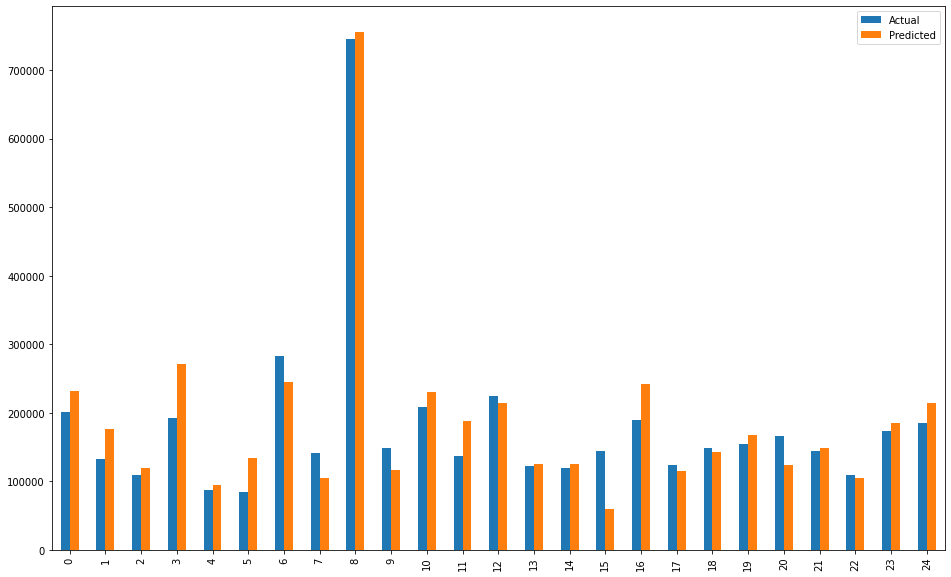

In [140]:
dt_df_25 = dt_df.head(25)
dt_df_25.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluation

In [114]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, y_pred_dt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, y_pred_dt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_dt)))
print('R-squared Error:', metrics.r2_score(y_test_new, y_pred_dt))

Mean Absolute Error: 26362.325342465752
Mean Squared Error: 1404470097.880137
Root Mean Squared Error: 37476.260457523465
R-squared Error: 0.7966260336959426


### Attempts to improve the Decision Tree Regression Model

In [115]:
#ew_10_train_dt=df_new[['Bedroom_TotRms','Garage_Cars','1st_Bsmt_SF','Year_Mod','BsmtSF',
 #               'OverallQual','GrLivArea','BedAbvGr','LotArea','ExterQual_TA']]

In [116]:
new_10_train_dt=df_new[['Bedroom_TotRms','Garage_Cars','1st_Bsmt_SF','Year_Mod','BsmtSF',
                 'OverallQual','GrLivArea','BedAbvGr','LotArea','ExterQual_TA']]


In [117]:
X_dt = new_10_train_dt.values

In [118]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y, test_size=0.2, random_state=0)

In [119]:
dt.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor()

In [120]:
y_pred_dt_new = dt.predict(X_test_dt)

In [141]:
dt_2_df= pd.DataFrame({'Actual': y_test_dt, 'Predicted': y_pred_dt_new})
dt_2_df.head()

,Actual,Predicted
0,200624,239000.0
1,133000,175000.0
2,110000,119900.0
3,192000,269790.0
4,88000,89500.0


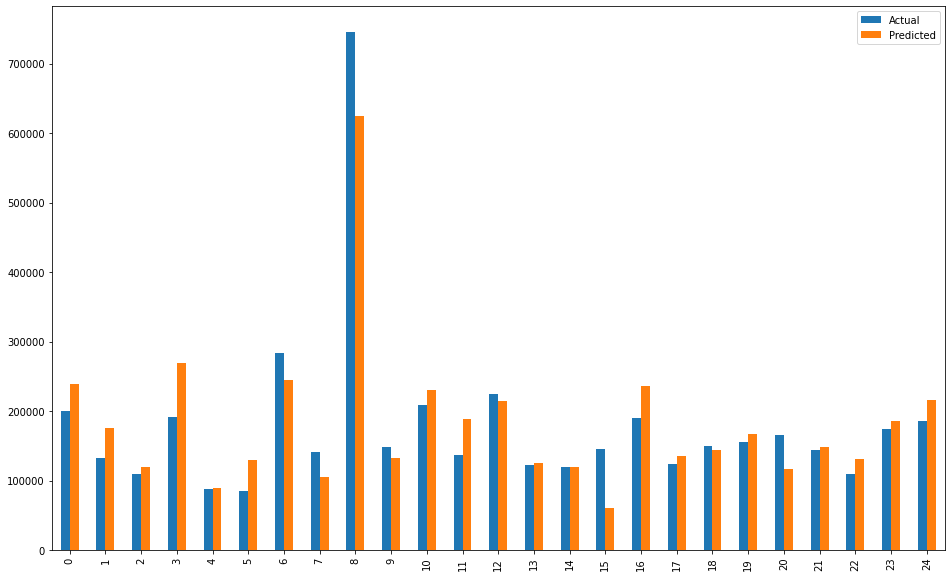

In [142]:
dt_2_df_25 = dt_2_df.head(25)
dt_2_df_25.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dt, y_pred_dt_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dt, y_pred_dt_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dt, y_pred_dt_new)))
print('R-squared Error:', metrics.r2_score(y_test_dt, y_pred_dt_new))

Mean Absolute Error: 25971.84931506849
Mean Squared Error: 1379398818.7671232
Root Mean Squared Error: 37140.25873317421
R-squared Error: 0.8002564744445393


R-squared Error is slightly higher, which means that model was improved

# SalePrice Prediction using the Multiple Linear Regression

In [122]:
trainX=df_new[['Bedroom_TotRms','Garage_Cars','1st_Bsmt_SF','Year_Mod','BsmtSF',
                 'OverallQual','GrLivArea','BedAbvGr','LotArea','ExterQual_TA']].values
trainY= house_train_data['SalePrice'].values

In [123]:
house_test_data['Bedroom_TotRms'] = 0.1*house_test_data['BedroomAbvGr'] + 0.9*house_test_data['TotRmsAbvGrd']
house_test_data['Garage_Cars'] = 0.5*house_test_data['GarageArea'] + 0.5*house_test_data['GarageCars']
house_test_data['1st_Bsmt_SF'] = 0.1*house_test_data['1stFlrSF'] + 0.9*house_test_data['TotalBsmtSF']
house_test_data['Year_Mod'] = 0.4*house_test_data['YearRemodAdd'] + 0.6*house_test_data['YearBuilt']
house_test_data['BsmtSF'] = 0.5*house_test_data['BsmtFinSF1'] + 0.5*house_test_data['BsmtUnfSF']

house_test_data['ExterQual_TA'] = pd.get_dummies(house_test_data).ExterQual_TA

testX=house_test_data[['Bedroom_TotRms','Garage_Cars','1st_Bsmt_SF','Year_Mod','BsmtSF',
                 'OverallQual','GrLivArea','2ndFlrSF','LotArea','ExterQual_TA']].values

In [124]:
MLR_pred=regressor.predict(testX)

In [125]:
pd.DataFrame({'Id': house_test_data.Id, 'SalePrice': MLR_pred}).head()

,Id,SalePrice
0,1461,112929.173201
1,1462,166406.899933
2,1463,178448.238828
3,1464,189488.742918
4,1465,212755.525827


 # SalePrice Prediction using the KNN

In [126]:
knn_2=neighbors.KNeighborsRegressor(n_neighbors =2)
knn_2.fit(trainX, trainY)  #fit the model
KNN_pred = knn_2.predict(testX)

In [127]:
pd.DataFrame({'Id': house_test_data.Id, 'SalePrice': KNN_pred}).head()

,Id,SalePrice
0,1461,135750.0
1,1462,147625.0
2,1463,204250.0
3,1464,177000.0
4,1465,184500.0


# SalePrice Prediction using the Decision Tree

In [128]:
dt.fit(trainX, trainY)
DT_pred = dt.predict(testX)

In [129]:
pd.DataFrame({'Id': house_test_data.Id, 'SalePrice': DT_pred}).head()

,Id,SalePrice
0,1461,159500.0
1,1462,170000.0
2,1463,194000.0
3,1464,181000.0
4,1465,254000.0
